In [ ]:
#Machine laerning Models

"""
Compare the models using barplots Accuracy score Algorithm
1.Logistic regression
2. KNN - K-Nearest Neighbor
3. SVM - Support Vector Machines
4.Naive Bayes - Gaussian Naive Bayes
5. Decision Trees
6. Random Forest
7. Confusion Matrix

"""

In [1]:
#Import Libraries
import numpy as np # for linear algebra
import pandas as pd # fordata processing, csv files
import matplotlib.pyplot as plt # for plotting / data visualization
import seaborn as sns # for statistical visualization
%matplotlib inline

#ML for regressions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#control diplay (this is optional)
pd.options.display.max_columns = 50
sns.set(style = "darkgrid", rc ={'axes.facecolor':'#CAF1DE'})

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the datset
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
"""
summary of columns
cp= chest pain
restbps -> resting blood pressure
chol -> cholestoral
fbs -> fastig blood sugar
restcg -> resting electrocardipography
exang -> exercise induced agina
oldpeak -> ST depression induced
slope -> the slope of the peak exercise
ca -> nuber of the major vessel
thal -> normal, fexied defect, reversible defect
target -> 1= yes, 0= no
"""

In [3]:
#Logistic Regression
#Goal is to produce either a 0 or 1

#column target
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [4]:
#get the mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


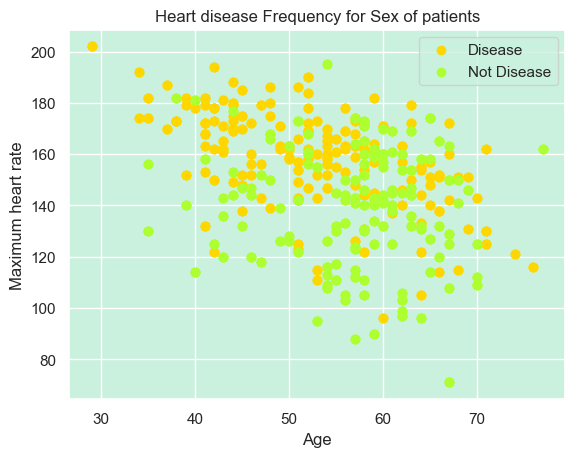

In [8]:
#create a scatter plot for heart disease VS Age and maximum heart rate
plt.scatter(x=df.age[df.target ==1], y=df.thalach[df.target ==1],c='#FFD700' ,label = 'Disease' )
plt.scatter(x=df.age[df.target ==0], y=df.thalach[df.target ==0],c='#ADFF2F', label = 'Not Disease' )

#add a legend
plt.legend()

#set a title
plt.title('Heart disease Frequency for Sex of patients')

#Set the labels
plt.xlabel('Age')
plt.ylabel('Maximum heart rate')

#show the plot
plt.show()

Logistic Regression

In [9]:
#create logistic regression
#help to solve problems with classification
#create an independent(y) and dependent variables(x)

#Creating a model for LogisticRegression

y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [10]:
#Normalize the data
x = (x_data - np.min(x_data))/ (np.max(x_data) - np.min(x_data))

In [11]:
#split the data (80% )training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=0)


In [12]:
#Transpose matrix
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [15]:
#Get accuracy using logistic regression
#Get test accuracy
accuracies ={}
lr = LogisticRegression() #helps us get a relationship between the features
lr.fit(x_train.T, y_train.T) 
acc = lr.score(x_test.T, y_test.T)*100

accuracies['LogisticRegression'] = acc

#get output
print('Test Accuracy {:2f}'.format(acc))


Test Accuracy 85.853659


K- Nearest Neighbors

In [16]:
#import the KNN classifier to the the accuracy score

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_train.T)

#Display output
print('{}NN Score: {:.2f}'.format(2, knn.score(x_test.T, y_test.T)*100))

2NN Score: 98.05


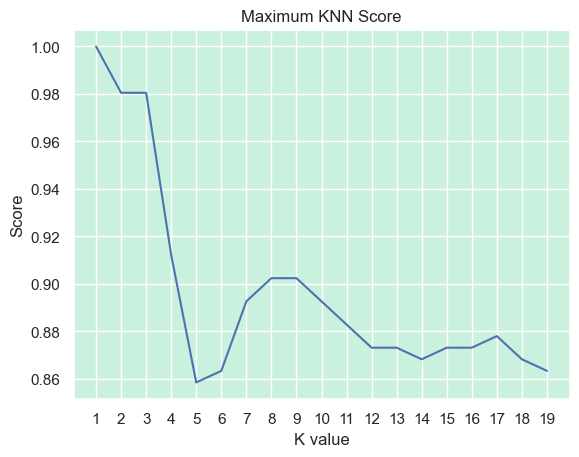

Maximum KNN score is 100.00%


In [22]:
#get max knn score for the model
score_list =[]
for i in range (1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))

#Show using a line plot
plt.plot(range(1,20), score_list)
plt.title('Maximum KNN Score')
plt.xticks(np.arange(1,20,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.show()

#get max KNN score in percentage
acc = max(score_list)*100
accuracies['KNN'] = acc
print('Maximum KNN score is {:.2f}%'.format(acc))


Support Vector Machine

In [25]:
#Test accuracu using the SVM
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T, y_train)*100
accuracies['SVN'] = acc
print('Test Accuracy of SVM is {:.2f}%'.format(acc))

Test Accuracy of SVM is 89.63%


Naive Bayes

In [26]:
#Get accuracy using naive bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_train.T, y_train.T)*100
accuracies['Naive Bayes'] = acc
print('Test Accuracy of Naive Bayes {:.2f}%'.format(acc))


Test Accuracy of Naive Bayes 82.07%


Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_train.T, y_train.T)*100
accuracies['Naive Bayes'] = acc
print('Test Accuracy of Decision trees {:.2f}%'.format(acc))


Test Accuracy of Decision trees 100.00%


Random Forest

In [29]:
#get accuracy for random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 1000, random_state=1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_train.T, y_train.T)*100
accuracies['Random Forest'] = acc
print('Test Accuracy of Random Forest is {:.2f}%'.format(acc))

Test Accuracy of Random Forest is 100.00%


Compare the model accuracies using barplot

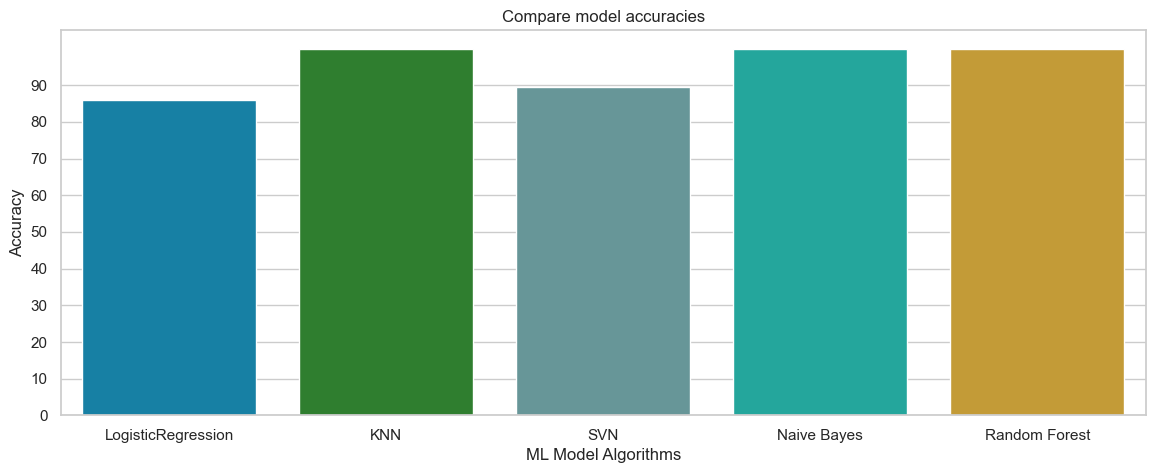

In [36]:
colors = ['#008BBB','#228B22','#5F9EA0','#0FBBAE','#DAA520','#CFC60E' ]

sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.yticks(np.arange(0,100,10))
plt.title("Compare model accuracies")
plt.ylabel('Accuracy')
plt.xlabel('ML Model Algorithms')
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()),palette = colors)
plt.show()


Confusion Matrix

In [ ]:
#Evaluate the performance of a classification model
""" 
True Positive (TP): The number of samples correctly predicted as positive.
True Negative (TN): The number of samples correctly predicted as negative.
False Positive (FP): The number of samples predicted as positive but are actually negative.
False Negative (FN): The number of samples predicted as negative but are actually positive.
RDC curve and AUC
"""

In [41]:
#yet confusion Matrices to liik at the inbalance dataset
#predict values

y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)


In [42]:
#import model for confusion matrix
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_rf = confusion_matrix(y_test, y_head_rf)

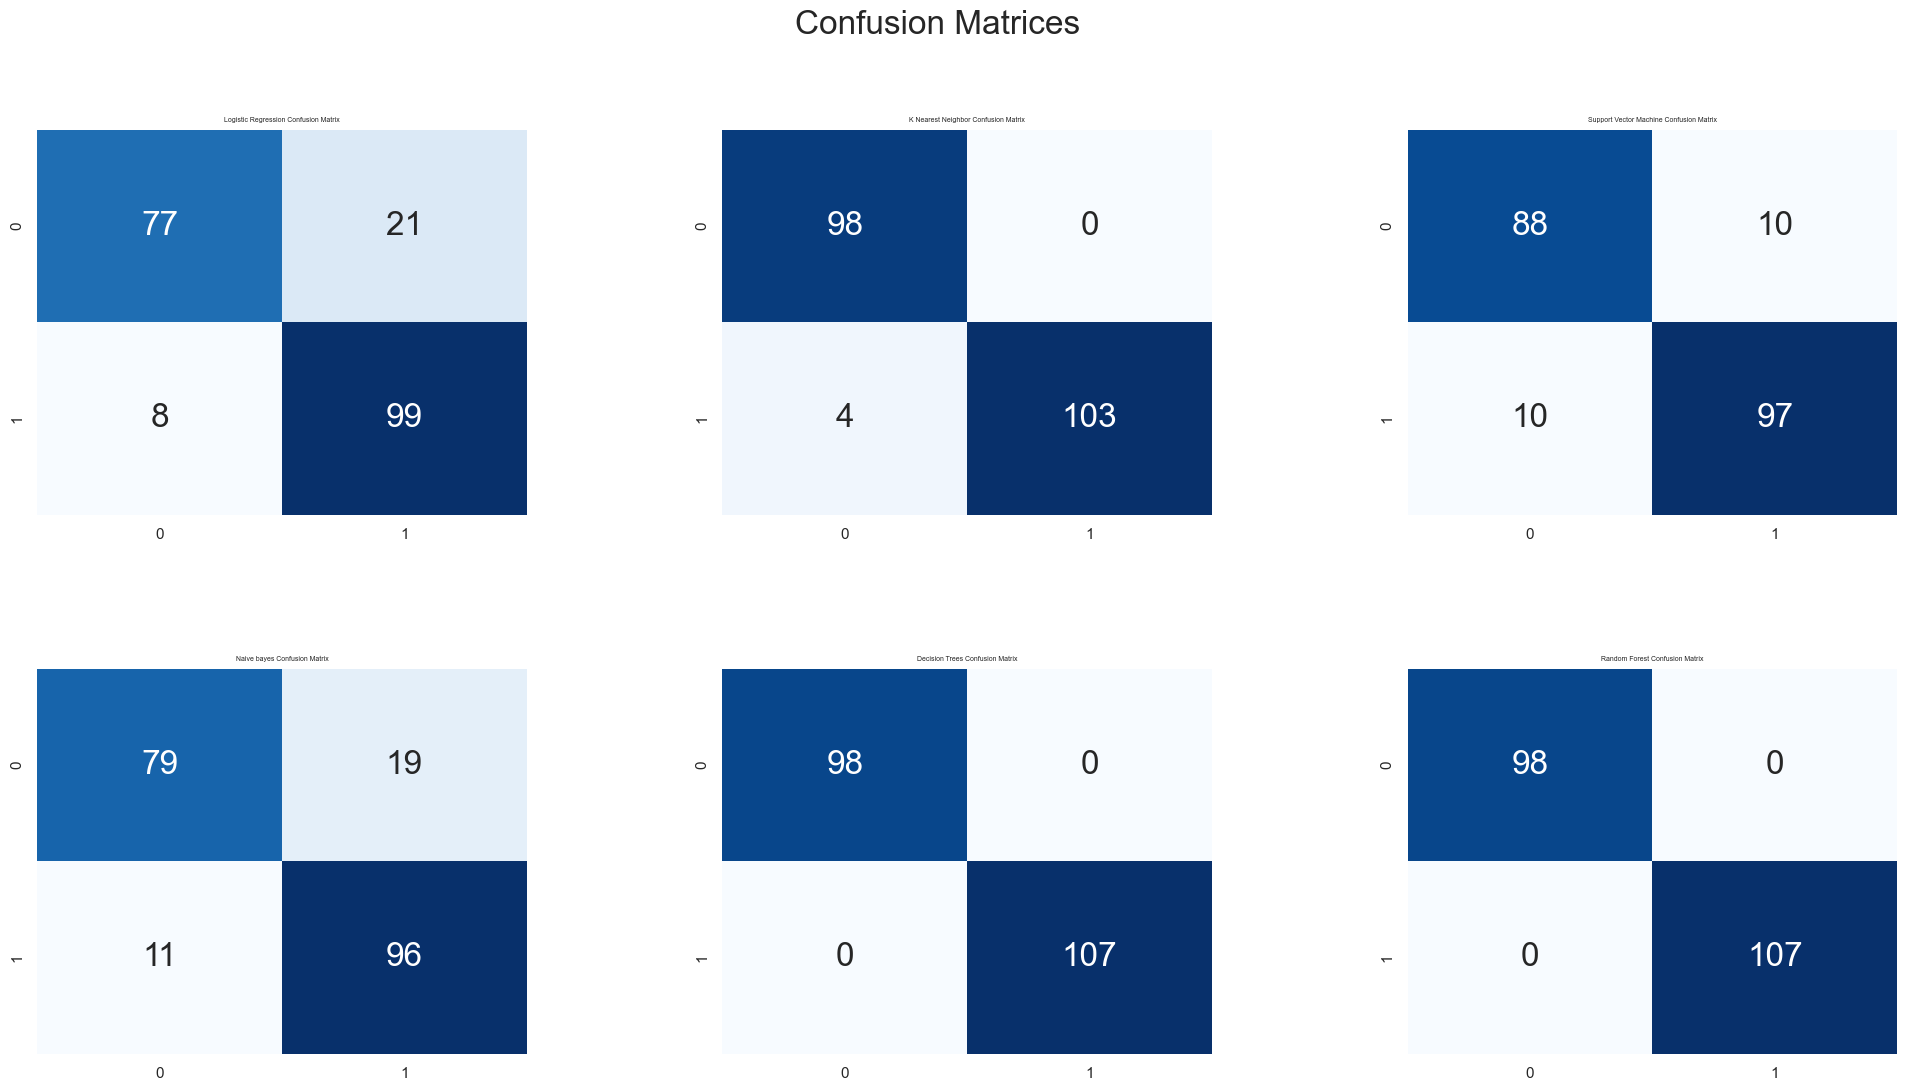

In [46]:
#Plotting heatmap using confusion matrix

plt.figure(figsize= (24, 12))
plt.suptitle('Confusion Matrices', fontsize= 24)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

#Logistic Regression Confusion Matrix
plt.subplot(2,3,1)
plt.title('Logistic Regression Confusion Matrix', fontsize=5)
sns.heatmap(cm_lr, annot = True, cmap = 'Blues', fmt ='d', cbar = False, annot_kws={'size': 24})

#Logistic KNN Matrix
plt.subplot(2,3,2)
plt.title('K Nearest Neighbor Confusion Matrix', fontsize=5)
sns.heatmap(cm_knn, annot = True, cmap = 'Blues', fmt ='d', cbar = False, annot_kws={'size': 24})

#Support Vector Machine Confusion Matrix
plt.subplot(2,3,3)
plt.title('Support Vector Machine Confusion Matrix', fontsize=5)
sns.heatmap(cm_svm, annot = True, cmap = 'Blues', fmt ='d', cbar = False, annot_kws={'size': 24})

#Naive Bayes Confusion Matrix
plt.subplot(2,3,4)
plt.title('Naive bayes Confusion Matrix', fontsize=5)
sns.heatmap(cm_nb, annot = True, cmap = 'Blues', fmt ='d', cbar = False, annot_kws={'size': 24})

#Decision Trees Confusion Matrix
plt.subplot(2,3,5)
plt.title('Decision Trees Confusion Matrix', fontsize=5)
sns.heatmap(cm_dtc, annot = True, cmap = 'Blues', fmt ='d', cbar = False, annot_kws={'size': 24})

#Random Forest Confusion Matrix
plt.subplot(2,3,6)
plt.title('Random Forest Confusion Matrix', fontsize=5)
sns.heatmap(cm_rf, annot = True, cmap = 'Blues', fmt ='d', cbar = False, annot_kws={'size': 24})

plt.show()



In [ ]:
""" 
The confusion matrix allows you to understand how well the model
is performimg and identify specific areas of inprovement
especially when it comes to dealing with imbalanced datasets or when
different types of errors have different costs or consequences
"""